In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
import time
import random
%matplotlib notebook
import matplotlib.ticker as mticker

In [3]:
import pandas as pd

# Theory

## The total chromaticity is given by :

# $$ \xi_{tot} = \frac{1}{4\pi} \oint \big[ m (s)D(s)+k(s)\big] \beta(s) ds $$

## Where m is the strength of the sextupole; D is the dispersion function; k is the quadrupole strength; $\beta$ is the beta function 

## Vary the strength of sextupole within a resonable range will not change the beta function, since the additional quadrupole strenth $k_{sext}$ is small 

## There exists a linear relationship between the chromaticity and the sextupole strength, and the slope is proportional to the product of D and $\beta$

# $$\begin{cases} \begin{align*} \xi_x &= \sum_i a_i \Delta x_i + x_0 \\
                              \xi_y &= \sum_j b_j \Delta x_j + y_0 \end{align*}\end{cases}$$ 




##  Where $\xi_x$, $\xi_y$ is the first order chromaticity of the original lattice 

## $\Delta x_i$ is the variation of the integrated strength of the sextupole with index of $i$ 

# Notice: in the BMAD lattice file of the HER, $\Delta x = \frac{k_2 L}{2} $

## $a_i$, $ b_j$ only depends on local optical functions, and they can be computed as following:

# $$a = \frac{1}{2 \pi} \beta_x \eta_x $$
# $$b = -\frac{1}{2 \pi} \beta_y\eta_x $$


## $x_0$, $y_0$ is the first order chromaticity of the HER with Rot installed before fixing the chrom

$ $

# Algorithm 

## Assume there are N sextupoles tuned to rematch the chromaticity, and 

# $$\Delta \xi= \xi_x - x_0 \; \; \; \Delta \xi_y = \xi_y - y_0 $$

## thus

## $$\begin{cases} \begin{align*} \Delta \xi_x &= \sum^{N}_{i=1} a_i \Delta x_i \\
                              \Delta \xi_y &= \sum^{N}_{j=1} b_j \Delta x_j \end{align*}\end{cases}$$ 



# Denote:

## $$\begin{cases} \begin{align*} \vec{A}&= (a_1, \; a_2, \; ..., \; a_N)  \\
                              \vec{B}&= (b_1, \; b_2, \; ..., \; b_N) \\
                              \vec{x}&= (\Delta x_1, \; \Delta x_2, \; ... \;, \Delta x_N)  \end{align*}\end{cases}$$ 
                              
# and,


## $$\begin{cases} \begin{align*} G_a &= \vec{A}\cdot \vec{x} - \Delta \xi_x  \\
                              G_b &= \vec{B}\cdot \vec{x} - \Delta \xi_y \end{align*}\end{cases}$$ 
                              
                              
## Construct the following function:

## $$f(\vec{x})= {G^2_a}+{G^2_b}+\lambda \vec{x}^{2}$$
 
##  The function needs to be solved at the global minimum ( $f(\vec{x}) \rightarrow 0$ when $\lambda = 0$ ). The last term is to prevent x from large values.

## The gradient of $f(\vec{x})$ is given by:
 
## $$\nabla f(\vec{x})=2G_a \vec{A}+2G_b \vec{B}+2\lambda\vec{x}$$
  
 

## Use gradient descent to approach the global minimum, for $j$th iteration:

# $$G^{j}_a = \vec{A}\cdot \vec{x}^{j} - \Delta \xi_x$$
# $$G_b^{j} = \vec{B}\cdot \vec{x}^{j} - \Delta \xi_y$$ 

# $$\nabla f^{j} = 2G^{j}_a \vec{A}+2G^{j}_b \vec{B} + 2 \lambda \vec{x}^j$$


# $$ \vec{x}^{j+1} = \vec{x}^{j} - \varepsilon \nabla f^{j}$$

# Where $\varepsilon$ is the learning rate 

# Once finish all the iteration steps, the minimimum varation is to be determined

# set the acceptance range $f(\vec{x}) \leq \delta$, the solution set  in the acceptance level with iteration step $ k $ is denoted by $X^{k} = \{ \Delta x^k_1, \Delta x^k_2, ..., \Delta x^k_N \}$

# find the maximum in $|X^k|$ for each k, and denoted by $|X^k|_{max}$

# find the minimum in $\{|X^k|_{max}\}$, and the index is denoted by $m$

# the solution is given by: $X^m = \{\Delta x^m_1, \Delta x^m_2, ..., \Delta x^m_N \}$

# check the solution, make sure all the sextupole strength stay in the physical limit and the sign does not change

$ $

# Note: due to the large degree of freedom, even for  the large iteration number, the result is correlated to the initial guess

In [4]:
def readf(file): #filereader
    df = pd.read_fwf(file)
    arr = df.to_numpy()
    return arr

In [5]:
def df(file): # dataframe
    arr = readf(file)
    pb=pd.DataFrame({'index':arr[:,0], 'name':arr[:,1], 's (m)':arr[:,2],\
                     'l (m)':arr[:,3], r'$b_2$':arr[:,4],\
                     'A':arr[:,5], 'B':arr[:,6] })
    pd.set_option('display.max_rows', None)
    display(pb)

In [6]:
arr = readf('sextupole_tuning.txt')

In [7]:
df('sextupole_tuning.txt')

,index,name,s (m),l (m),$b_2$,A,B
0,1675,SD3TLEA,194.149,1.03,-3.5766,0.6936,-1.7835
1,2200,SF6TLEA,310.907,0.334,0.8176,6.3622,-1.9253
2,2240,SD7TLEA,345.49,1.03,-3.6069,0.6936,-1.7767
3,2256,SF8TNEA,351.417,0.334,1.7508,4.0217,-4.2993
4,2358,SD7NREA,436.058,1.03,-4.5822,0.6936,-1.7773
5,2414,SF6NREA,477.145,0.334,1.4665,6.3625,-1.9261
6,2454,SD5NREA,511.729,1.03,-1.3892,0.6936,-1.7935
7,2510,SF4NREA,552.816,0.334,2.0922,6.3622,-1.942
8,2550,SD3NREA,587.399,1.03,-1.4427,0.6936,-1.798
9,2600,SF2NREA,628.486,0.334,0.3711,6.3626,-1.9336


In [8]:
os = arr[:-1,4]
osa = abs(os)

In [9]:
A = arr[:-1,5]    #coefficent of the first equation

B = arr[:-1,6]    # coefficent of the second equation

#Rot
x0 = -0.284156  
y0 = -5.532779 

#Rota
#x0 = -1.190362  
#y0 = -6.084533 

Xix = 1.593508   #target value to be reached
Xiy = 1.622865   #target value to be reached

dx = Xix - x0 # variation of xi_x
dy = Xiy - y0 # variation of xi_y

In [10]:
def xi(x):
    xix = x.dot(A) + x0
    xiy = x.dot(B) + y0
    return xix,xiy

In [11]:
def gd(x, ep, lam, Ni): #gradient descent
    
    X = zeros((Ni,len(os)))
    fx = []
    GA = []
    GB = []

    for i in range(Ni):
        
        Ga = x.dot(A)-dx
        Gb = x.dot(B)-dy
        
        X[i,:] = x
        fx.append(Ga**2+Gb**2)
        GA. append(Ga)
        GB. append(Gb)
        gradient = 2*Ga*A+2*Gb*B+2*dot(lam,x)
        x -= gradient*ep


    X = array(X)
    fx = array(fx)
    GA = array(GA)
    GB = array(GB)

    
    return X, fx, GA, GB

In [12]:
def minimizer(X, fx, acpt): # find the minimum variation
        
    a = where(abs(fx)<= acpt)[0] # index of accepted value
    
    Xa = X[a] # variation of sextupole strength in the acceptance range
    Xb = abs(Xa) 
    
    mm = [where(Xb[i,:] == max(Xb[i,:]))[0][0] for i in range(len(Xa))] # find the maxmium variation

    Xm = [Xb[i,mm[i]] for i in range(len(mm))] # record all the maximum values

    mi = where(fx[a] == min(fx[a]))[0][-1] # find the index of the minimum in the data set
    
    return a, mi, Xm
    

In [13]:
def result(x, ep, lam, Ni, acpt):  # result plotter 
    
    X, fx, GA, GB = gd(x, ep, lam, Ni)
    
    a, mi, Xm =  minimizer(X, fx, acpt)
    
    figure(figsize=(10, 8))
    plot(a, Xm,'r.')
    xlabel("iteration step", size = 25)
    ylabel('abs value of the maximum variation', size = 25)
    show()

    
    figure(figsize=(10, 8))
    semilogy(a, fx[a],'b.')
    xlabel("iteration step", size = 25)
    ylabel(r'$f(\vec{x})$', size = 25)
    show()
    
    print("Equation 1's discrepancy: ",GA[a][mi])
    print(' ')
    print("Equation 2's discrepancy: ",GB[a][mi])
    print(' ')
    print("f(x): ",fx[a][mi])
    print(' ')
    print(' ')
    print(' ')
    print("variation of sextupole strenth:", X[a][mi])
    print(' ')
    print("the original sextupole strength:",os)
    print(' ')
    print("the new sextupole strength:", os+X[a][mi])
    print(' ')
    print(' step reached the desired solution:',a[mi])
    print(' ')
    print(' ')
    return X[a][mi]

In [14]:
ep = 5e-4 # learning rate

lam= 0   # lambda

Ni = 1000  # number of iterations

acpt = 1000 # acceptance level (delta)

In [15]:

#x=array([-0.4309688,  0.23606408, -0.4, -2.28571429,  0.02857143,-2.31428571,  0.77142857])

#x = (max(osa)*random.uniform(1,1.2)-osa)*os/max(osa) # initial guess of vec{x} for minimized variation 

<IPython.core.display.Javascript object>


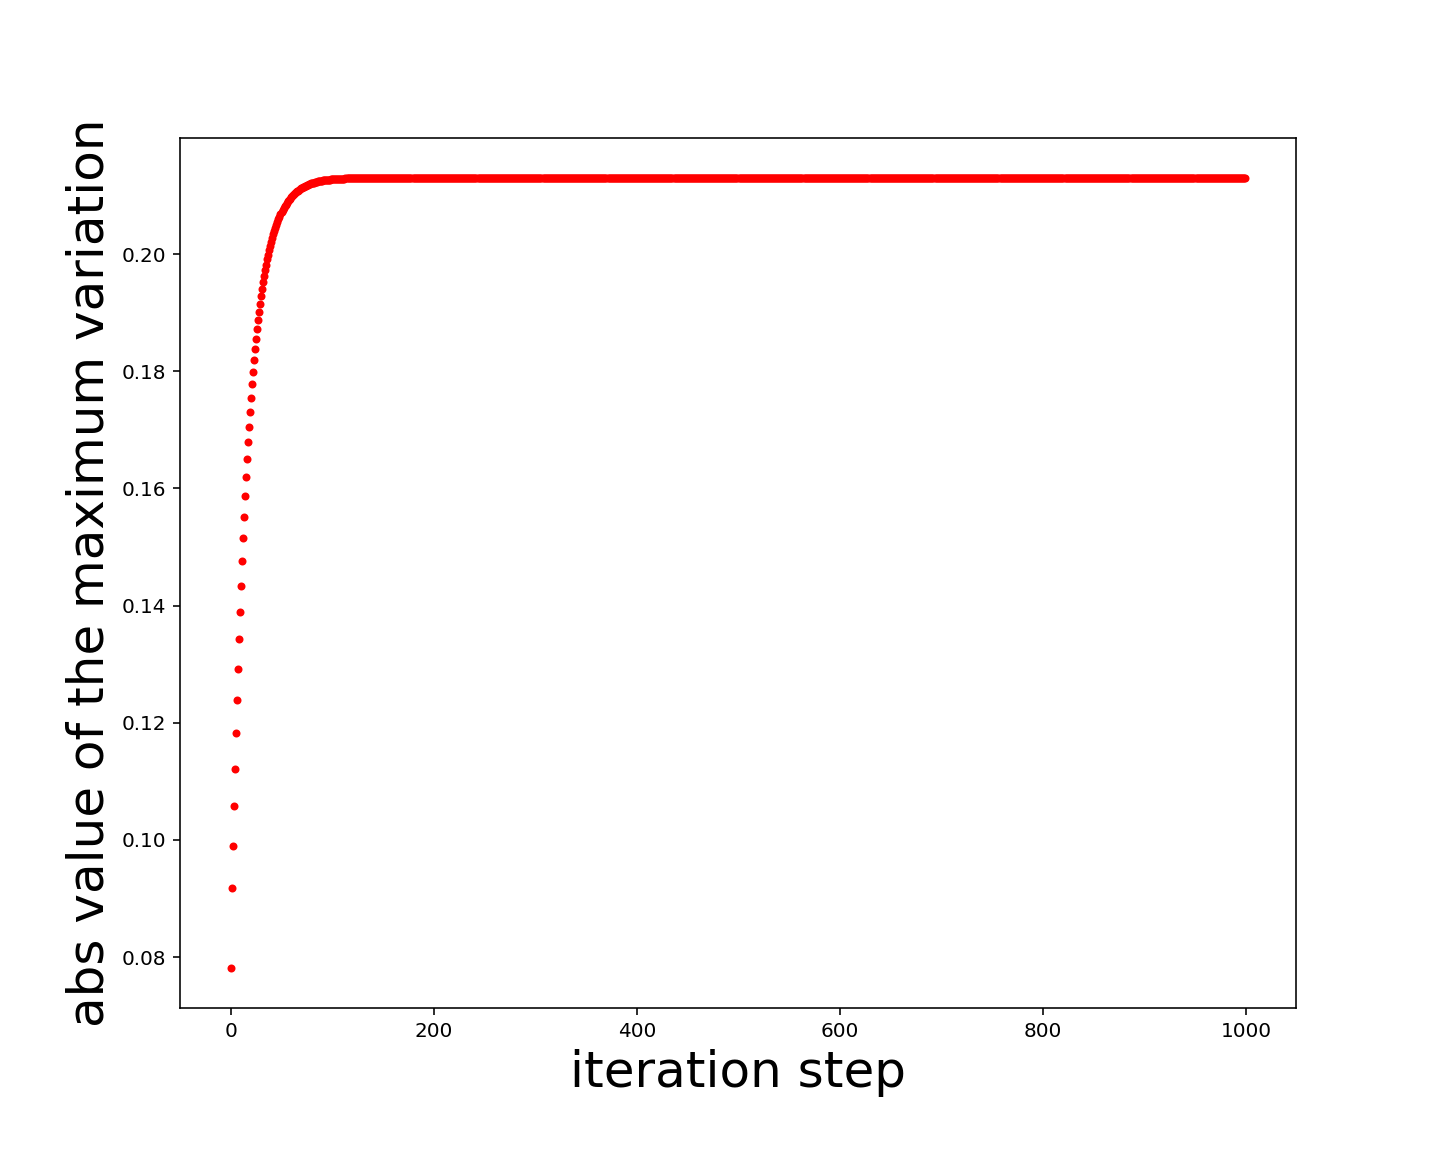

<IPython.core.display.Javascript object>


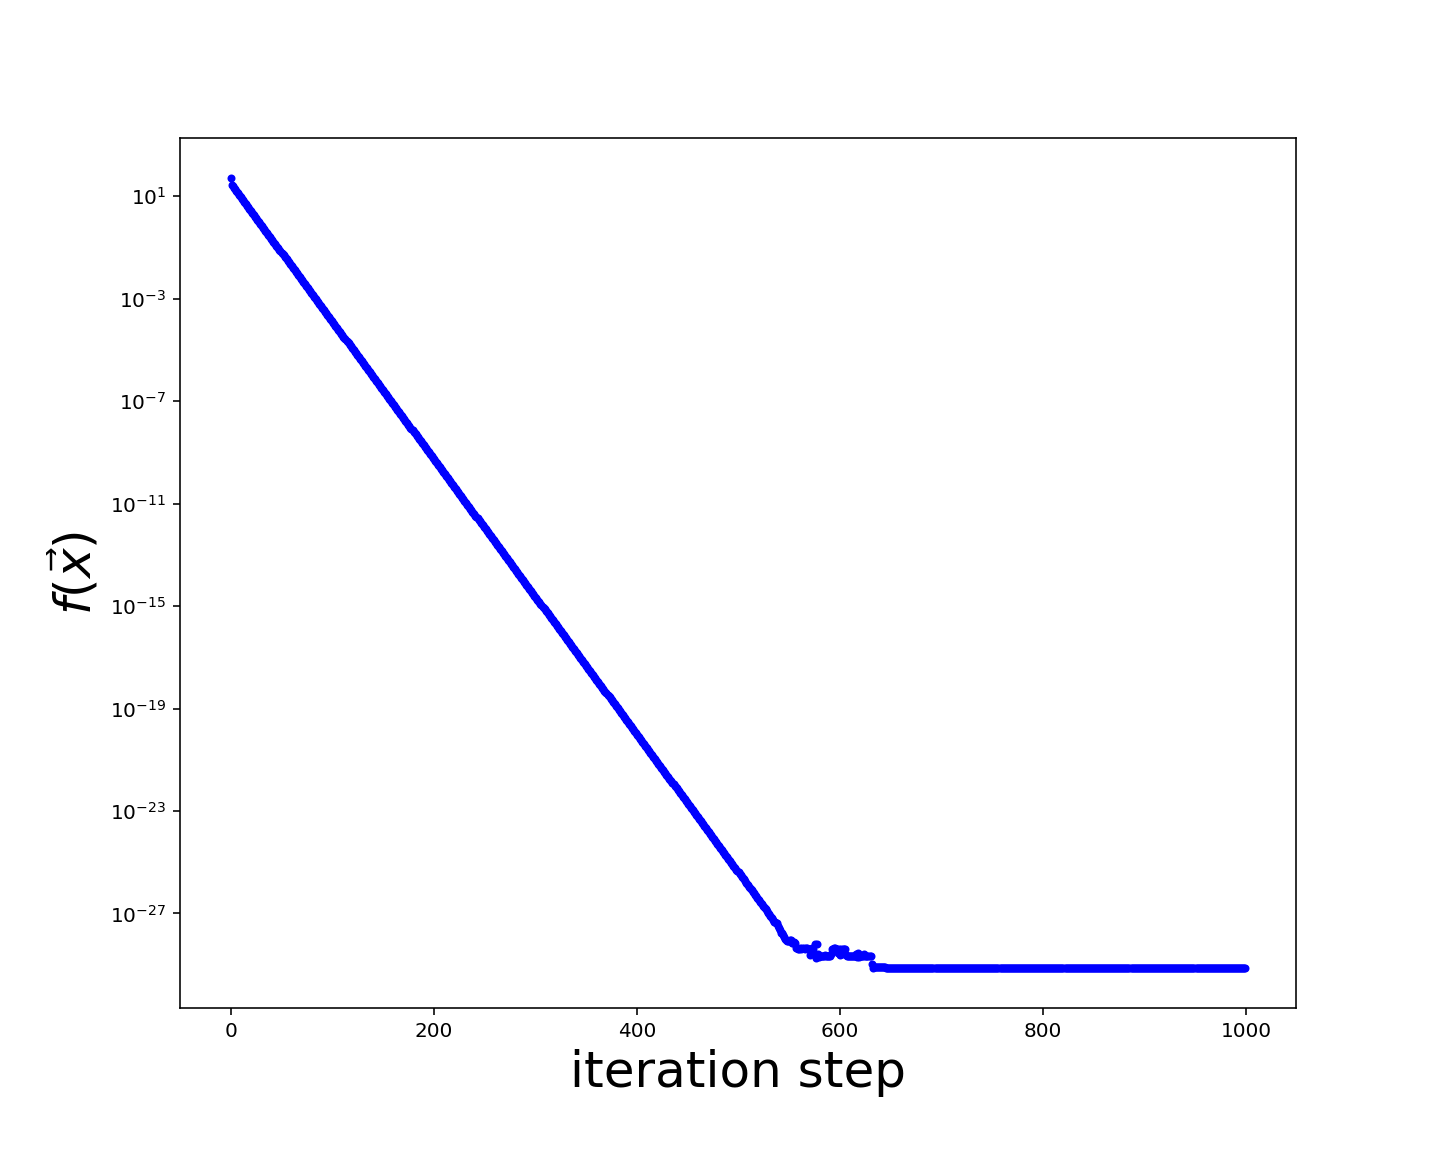

Equation 1's discrepancy:  -2.220446049250313e-16
 
Equation 2's discrepancy:  -2.6645352591003757e-15
 
f(x):  7.14905195356542e-30
 
 
 
variation of sextupole strenth: [-0.21276749  0.05136981 -0.21218652 -0.19820094 -0.20674082  0.07046493
 -0.18398941  0.08279552 -0.18578575  0.03456659  0.02331907 -0.21183002
  0.03859808 -0.18792894  0.04524105 -0.18680071 -0.19195751  0.08825264
 -0.15270507  0.04604834 -0.19658646  0.06271459  0.0515304  -0.18368654
  0.04045369 -0.21031729  0.08747313 -0.14773865 -0.10001659 -0.13454237
  0.02852238 -0.21032023  0.07441247 -0.21219552  0.03478126  0.08826709
 -0.16236009  0.04232    -0.20644264  0.03565172 -0.21302202 -0.14725709
 -0.19099807  0.0525138  -0.19038912]
 
the original sextupole strength: [-3.5766 0.8176 -3.6069 1.7508 -4.5822 1.4665 -1.3892 2.0922 -1.4427
 0.3711 0.077 -3.0697 0.4965 -1.5266 0.6599 -1.5372 -5.4605 2.2961 -6.8029
 0.6911 -1.903 1.2261 0.8562 -1.3587 0.5406 -2.9257 2.2597 -6.9088 1.8705
 -7.2423 0.2165 -2.8325 1.6

In [16]:
t0=time.time()

x = (max(osa)-osa)*1.51e-2*os/std(os) # initial guess of vec{x} for minimized strength

sol=result(x, ep, lam, Ni, acpt)

t1=time.time()
print("Time taken:",t1-t0,"seconds")

In [17]:
xi(sol)

(1.5935079999999997, 1.6228649999999973)

In [18]:
where(os*(os+sol)<=0)[0] # make sure the sign does not change for each sextupole

array([], dtype=int64)

In [19]:
for i in range(len(os)):
    print(arr[i,1],'[B2] =',(os+sol)[i])

SD3TLEA [B2] = -3.78936749307981
SF6TLEA [B2] = 0.8689698066777909
SD7TLEA [B2] = -3.8190865236939087
SF8TNEA [B2] = 1.5525990574733197
SD7NREA [B2] = -4.788940822681298
SF6NREA [B2] = 1.53696493445832
SD5NREA [B2] = -1.5731894085982612
SF4NREA [B2] = 2.1749955215134955
SD3NREA [B2] = -1.6284857501747612
SF2NREA [B2] = 0.40566658590712024
SF2NLEA [B2] = 0.10031907109857051
SD3NLEA [B2] = -3.2815300178562135
SF4NLEA [B2] = 0.535098075688037
SD5NLEA [B2] = -1.7145289448117065
SF6NLEA [B2] = 0.7051410493091207
SD7NLEA [B2] = -1.7240007087574616
SD7FREA [B2] = -5.652457509573806
SF6FREA [B2] = 2.3843526367131638
SD5FREA [B2] = -6.95560507242733
SF4FREA [B2] = 0.7371483350685288
SD3FREA [B2] = -2.0995864593287275
SF2FREA [B2] = 1.28881458714373
SF2FLEA [B2] = 0.907730396526214
SD3FLEA [B2] = -1.5423865352020232
SF4FLEA [B2] = 0.5810536887485437
SD5FLEA [B2] = -3.1360172939656104
SF6FLEA [B2] = 2.347173125263092
SD7FLEA [B2] = -7.0565386453909795
SF8FOEA [B2] = 1.7704834077097718
SD7OREA [B2